In [1]:
import sys
import os
import importlib
sys.path.append(os.path.abspath(os.path.join('../scripts/')))

In [2]:
import tools

In [3]:
import makedfs

In [4]:
importlib.reload(tools);
importlib.reload(makedfs);

In [5]:
tools = tools.Util()
prepdf = makedfs.Pypoint()

# import data
pipeline_path = "../pipe.json"
metadata_path = "../data/metadata.json"
save_path = "../data"

#### Select region to analyze and provide cooridinates below

transform the 3857 format to lat/long format using the link to converter below

https://epsg.io/transform#s_srs=3857&t_srs=4326
    
to select region, you can visualize the map here

https://epsg.io/map#srs=4326&x=-93.864003&y=41.951945&z=11&layer=satellite

In [22]:
coordinates = [[-113.6972053, 42.0732283], [-113.699939, 42.071418],
               [-113.703642, 42.068506], [-113.701776, 42.067423],
               [-113.699703, 42.069047]]

In [23]:
# [-113.699939, 42.071418],
# [-113.703642, 42.068506],
# [-113.701776, 42.067423],
# [-113.699703, 42.069047]

In [24]:
# Generate the polygon with the above defined points

polygon2 = tools.generate_polygon(coordinates, 4326)
# Looking at the region selected by the polygon

tools.show_on_map(polygon2, 15)

In [ ]:
# Loading the points

data_df = prepdf.fetch_data(coordinates, metadata_path, save_path+"/original.csv", pipeline_path)

In [11]:
# Creating the geo dataframe out of the loaded point clouds.

geo_df = data_df.loc[0,"data"]

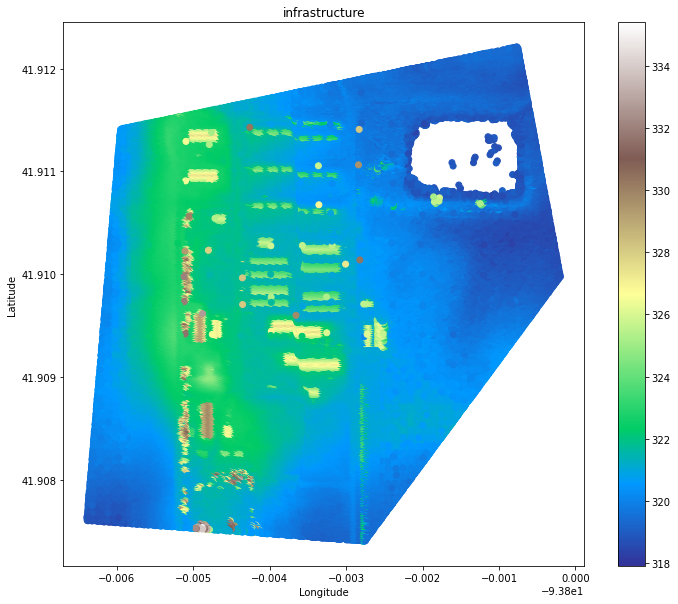

In [32]:
# Heat map of the loaded maps

prepdf.plot_heatmap(geo_df, "infrastructure", save_path+"/image1.png")

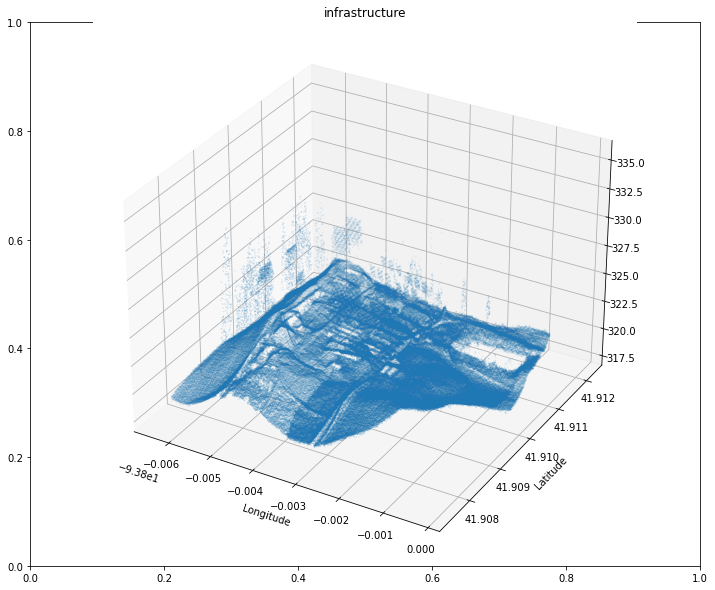

In [12]:
# 3d render of the loaded points

prepdf.render_3d(geo_df, "infrastructure", save_path+"/image1_3d.png")

### Resampling

In [13]:
# resampling and creating new dataframes using grid sampling
gr_df = prepdf.grid_resample(geo_df, 0.001)

In [14]:
# checking the new shape
gr_df.shape
(6053, 2)

(6053, 2)

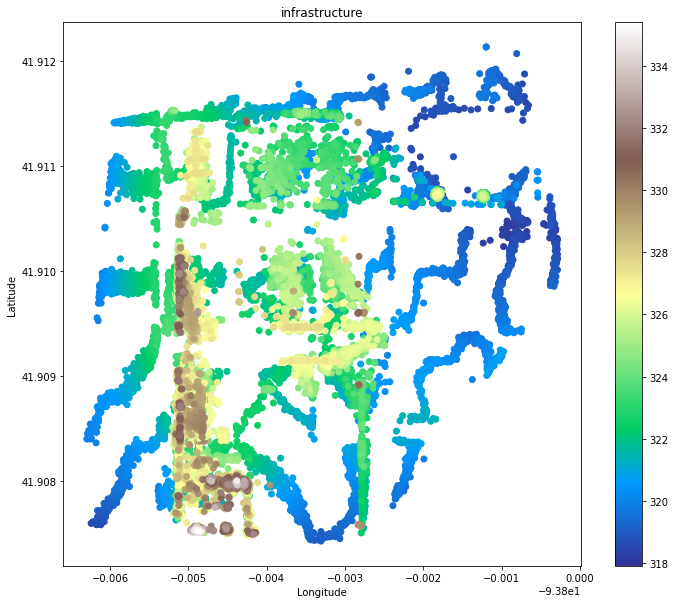

In [15]:
# ploting the new points

prepdf.plot_heatmap(gr_df, "infrastructure", save_path+"/image2.png")

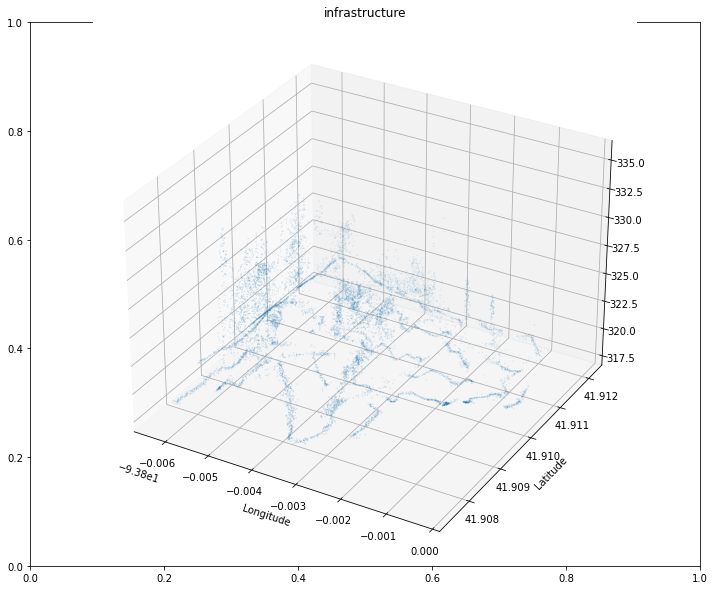

In [16]:
prepdf.render_3d(gr_df, "infrastructure", save_path+"/image2_3d.png")

### Calculating TWI

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


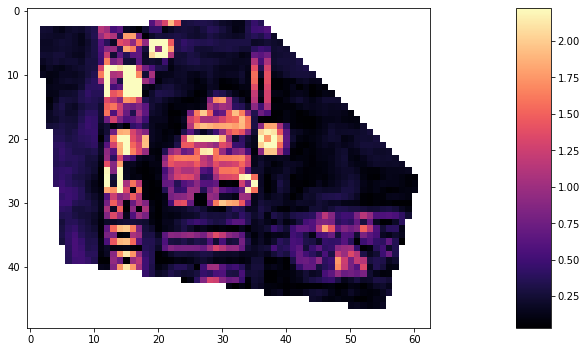

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


<Figure size 432x288 with 0 Axes>

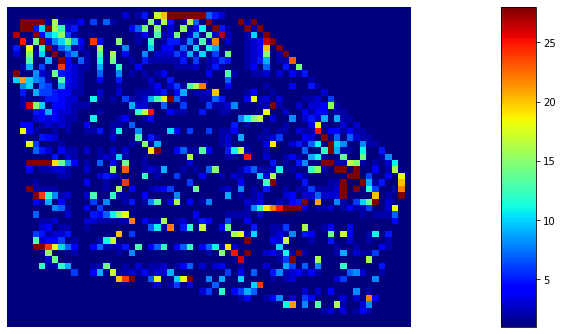

<Figure size 432x288 with 0 Axes>

In [17]:
# calculating Topographic Wetness Index.

full_df = prepdf.calculate_TWI(geo_df, 0.0001, save_slope=save_path+"/slope1.png", save_accum=save_path+"/accum1.png")

In [18]:
# checking whether the calculated TWI result is present 

full_df.head(10)

,elevation,geometry,TWI
0,319.09,POINT (-93.80081 41.91207),NaN
1,319.15,POINT (-93.80122 41.91207),NaN
2,319.36,POINT (-93.80241 41.91177),6.875971
3,318.70,POINT (-93.80081 41.91146),6.462330
4,319.30,POINT (-93.80280 41.91177),NaN
5,328.10,POINT (-93.80283 41.91141),6.061983
6,318.61,POINT (-93.80218 41.91117),5.104735
7,320.84,POINT (-93.80398 41.91146),6.687635
8,321.60,POINT (-93.80439 41.91148),6.423612
9,330.34,POINT (-93.80426 41.91143),5.857342
